In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pickle
import lzma
import matplotlib.pyplot as plt
import csv
import h5py
from tqdm import tqdm
sys.path.insert(0, os.path.abspath('/home/suryakalia/documents/summer/exploration/kasthurilab_connectomics/'))
# Need to add above path since VSCode Jupyter Notebook doesn't respect system's $PYTHONPATH variable
# This will be eliminated once my module is converted to a conda package and installed to the conda env

In [2]:
# with open( "/home/suryakalia/documents/summer/tests/cremi_A_analysis/metadata_cleft_overlap_volume.csv", newline='') as f:
# with open( "/home/suryakalia/documents/summer/tests/hanyu_analysis/metadata_cleft_overlap_volume.csv", newline='') as f:
with open( "/home/suryakalia/documents/summer/tests/cremi_clean/metadata_cleft_overlap_volume.csv", newline='') as f:
  reader = csv.reader(f)
  synapse_overlap_list = list(reader)[1:]

In [3]:
len(synapse_overlap_list)

37153

In [4]:
synapse_overlap_map = {}
synapse_volume_map = {}

for row in tqdm(synapse_overlap_list):
  neuron_pair = row[0]
  synapse_id = row[1]
  volume = int(row[8])
  if (volume == 0):
    continue
  
  if synapse_id in synapse_overlap_map:
    synapse_overlap_map[synapse_id].append(neuron_pair)
  else:
    synapse_overlap_map[synapse_id] = [neuron_pair]
  
  synapse_volume_map[synapse_id + "_" + neuron_pair] = volume

print(len(synapse_overlap_map))

100%|██████████| 37153/37153 [00:00<00:00, 1462048.49it/s]

127


In [5]:
synapse_overlap_map

{'810.0': ['20474_75914',
  '20474_18053',
  '20474_1377',
  '11715_75914',
  '11715_18053',
  '11715_1377',
  '75914_18053',
  '75914_1377',
  '75914_29998',
  '75914_184915',
  '18053_1377',
  '1377_29998',
  '1377_184915'],
 '777.0': ['20474_9552', '20474_12735', '9552_12735'],
 '800.0': ['20474_13635',
  '20474_19887',
  '13635_7019',
  '13635_19887',
  '13635_140434',
  '7019_19887',
  '7019_140434'],
 '803.0': ['20474_13635',
  '20474_2170',
  '20474_19887',
  '13635_2170',
  '13635_19887',
  '2170_19887'],
 '782.0': ['4944_11715',
  '4944_24745',
  '4944_3307',
  '4944_10332',
  '4944_135310',
  '4944_51265',
  '4944_148943',
  '4944_147694',
  '4944_149337',
  '11715_11901',
  '11715_40080',
  '11715_24745',
  '11715_129436',
  '9588_11901',
  '9588_24745',
  '9588_11315',
  '9588_129436',
  '11901_24745',
  '11901_129436',
  '40080_24745',
  '40080_3307',
  '40080_129436',
  '40080_85610',
  '24745_11315',
  '24745_3307',
  '24745_10332',
  '24745_129436',
  '24745_85610',
  '

In [6]:
num_neighboring_pairs = {key:len(value) for key,value in synapse_overlap_map.items()}

In [7]:
print(len(num_neighboring_pairs))
print(num_neighboring_pairs)

127
{'810.0': 13, '777.0': 3, '800.0': 7, '803.0': 6, '782.0': 52, '783.0': 8, '790.0': 18, '804.0': 5, '805.0': 6, '858.0': 21, '831.0': 10, '865.0': 8, '772.0': 12, '746.0': 1, '760.0': 18, '870.0': 28, '854.0': 18, '855.0': 18, '846.0': 11, '762.0': 14, '819.0': 5, '811.0': 8, '795.0': 5, '881.0': 10, '807.0': 9, '821.0': 1, '834.0': 1, '878.0': 3, '779.0': 13, '837.0': 19, '836.0': 13, '759.0': 32, '748.0': 7, '750.0': 3, '850.0': 6, '851.0': 25, '828.0': 6, '747.0': 3, '833.0': 3, '845.0': 18, '843.0': 5, '844.0': 3, '830.0': 3, '863.0': 3, '808.0': 6, '797.0': 5, '786.0': 3, '796.0': 20, '809.0': 3, '829.0': 15, '886.0': 3, '852.0': 5, '847.0': 3, '861.0': 13, '849.0': 11, '856.0': 10, '770.0': 13, '789.0': 7, '761.0': 9, '754.0': 26, '758.0': 16, '775.0': 3, '791.0': 7, '814.0': 15, '859.0': 3, '788.0': 9, '874.0': 13, '857.0': 12, '888.0': 5, '793.0': 14, '771.0': 18, '835.0': 34, '766.0': 6, '820.0': 11, '763.0': 5, '794.0': 12, '823.0': 3, '767.0': 7, '815.0': 11, '817.0': 22

In [8]:
neighbor_count = np.array(list(num_neighboring_pairs.values()))

In [9]:
neighbor_count

array([13,  3,  7,  6, 52,  8, 18,  5,  6, 21, 10,  8, 12,  1, 18, 28, 18,
       18, 11, 14,  5,  8,  5, 10,  9,  1,  1,  3, 13, 19, 13, 32,  7,  3,
        6, 25,  6,  3,  3, 18,  5,  3,  3,  3,  6,  5,  3, 20,  3, 15,  3,
        5,  3, 13, 11, 10, 13,  7,  9, 26, 16,  3,  7, 15,  3,  9, 13, 12,
        5, 14, 18, 34,  6, 11,  5, 12,  3,  7, 11, 22,  6,  8, 18, 12, 10,
       14,  5,  3, 17, 11,  6, 18, 20, 18, 14,  5,  5,  3,  9,  2, 16,  3,
       20, 11, 37,  3, 16, 23, 13, 14, 24, 10, 10, 23,  5,  5, 22,  8, 22,
        9,  3, 21, 26, 37,  6,  3,  1])

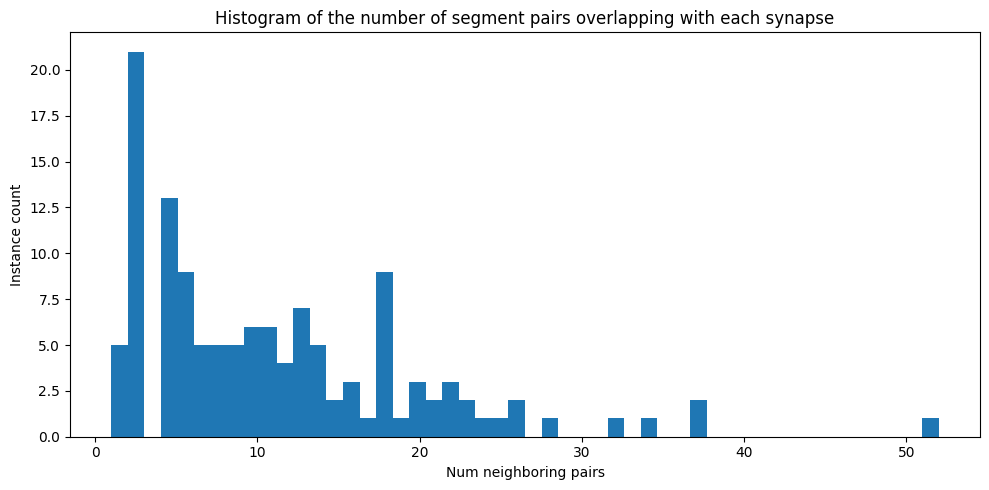

In [10]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.hist(neighbor_count, bins=50)
plt.xlabel("Num neighboring pairs")
plt.ylabel("Instance count")
plt.title("Histogram of the number of segment pairs overlapping with each synapse")
plt.show() 

In [11]:
print(min(neighbor_count))
print(max(neighbor_count))


1
52


In [12]:
print([key for key, val in num_neighboring_pairs.items() if val == 52])

['782.0']


In [13]:
print(synapse_overlap_map['782.0'])

['4944_11715', '4944_24745', '4944_3307', '4944_10332', '4944_135310', '4944_51265', '4944_148943', '4944_147694', '4944_149337', '11715_11901', '11715_40080', '11715_24745', '11715_129436', '9588_11901', '9588_24745', '9588_11315', '9588_129436', '11901_24745', '11901_129436', '40080_24745', '40080_3307', '40080_129436', '40080_85610', '24745_11315', '24745_3307', '24745_10332', '24745_129436', '24745_85610', '24745_135310', '24745_51265', '24745_148943', '24745_147694', '24745_149337', '24745_148123', '11315_129436', '11315_51265', '3307_85610', '3307_135310', '3307_51265', '3307_148943', '3307_149337', '3307_148123', '10332_51265', '129436_85610', '85610_148943', '85610_149337', '135310_51265', '135310_148943', '135310_148123', '51265_148943', '51265_147694', '148943_149337']


In [14]:
# f = h5py.File("/home/suryakalia/documents/summer/datasets/cremi/sample_A_20160501.hdf", 'r')
# f = h5py.File("/home/suryakalia/documents/summer/tests/hanyu_analysis/p105.h5", 'r')
f = h5py.File("/home/suryakalia/documents/summer/datasets/cremi_clean/clean_sample_A.h5", 'r')

clefts = np.array(f["volumes/labels/clefts"]).astype(np.uint32)

In [15]:
# f = h5py.File("/home/suryakalia/documents/summer/datasets/cremi/sample_A_20160501.hdf", 'r')
# f = h5py.File("/home/suryakalia/documents/summer/tests/hanyu_analysis/p105.h5", 'r')
f = h5py.File("/home/suryakalia/documents/summer/datasets/cremi_clean/clean_sample_A.h5", 'r')
neuron_ids = np.array(f["volumes/labels/neuron_ids"])

In [26]:
print(neuron_ids[0,:,:])

[[1881841 1881841 1881841 ...       0       0       0]
 [1881841 1881841 1881841 ...       0       0       0]
 [1881841 1881841 1881841 ...       0       0       0]
 ...
 [2289281 2289281 2289281 ... 7323310 7323310 7323310]
 [2289281 2289281 2289281 ... 7323310 7323310 7323310]
 [2289281 2289281 2289281 ... 7323310 7323310 7323310]]


In [16]:
clipped_neuron_ids = np.where(neuron_ids == 4944 , 1, 0)
clipped_clefts = np.where(clefts == 782, 1, 0)

(125,)
[ 8350  9807 11758 13912 15811 17396 17707 17544 14790 14139 13625 13482
 13804 14043 14508 14781 14985 15246 17642 22282 24437 22992 20117 18263
 18160 19411 20566 23058 23658 23788 23102 24400 25479 30231 32557 34416
 36047 42713 46559 51741 52325 49336 46062 43901 40176 33584 29773 27584
 26465 25744 21795 17810 17499 19821 21112 22358 22116 23255 23999 23488
 23946 23849 21676 20365 18042 16062 12586 10276  8668  8228  7826  7169
  7087  6862  6778  6943  7170  8081  8596  9068  8600  8626  7641  6443
  7695  8258  8436  9043 10938 13534 14674 15850 17205 18153 19034 19985
 20092 24771 30377 33144 34348 37711 39852 38160 36558 33956 28271 26037
 24059 24343 26095 27769 29181 30079 29593 28332 26331 24130 20966 18933
 18135 17575 17839 17737 17640]
40


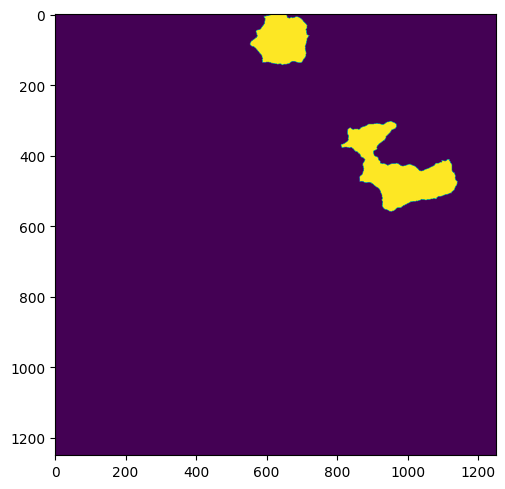

In [20]:
plt.imshow(clipped_neuron_ids[39 , :, :])
neuron_layer_sum = np.sum(clipped_neuron_ids, axis=(1,2))
print(neuron_layer_sum.shape)
print(neuron_layer_sum)
print(neuron_layer_sum.argmax())

(125,)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  755  765  883 1069  841  723 1228 1176 1118 1646    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
39


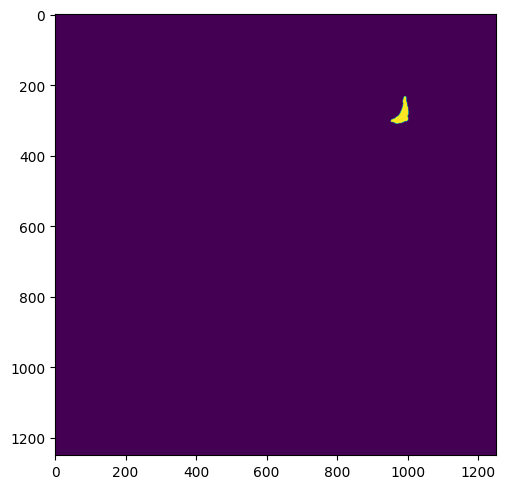

In [19]:
plt.imshow(clipped_clefts[39,:,:])
cleft_layer_sum = np.sum(clipped_clefts, axis=(1,2))
print(cleft_layer_sum.shape)
print(cleft_layer_sum)
print(cleft_layer_sum.argmax())

In [39]:
def get_unique_id_list(overlap_list):
  s = set()
  for pair_str in overlap_list:
    id_str_list = pair_str.split('_')
    for id_str in id_str_list:
      s.add(int(id_str))
  return s

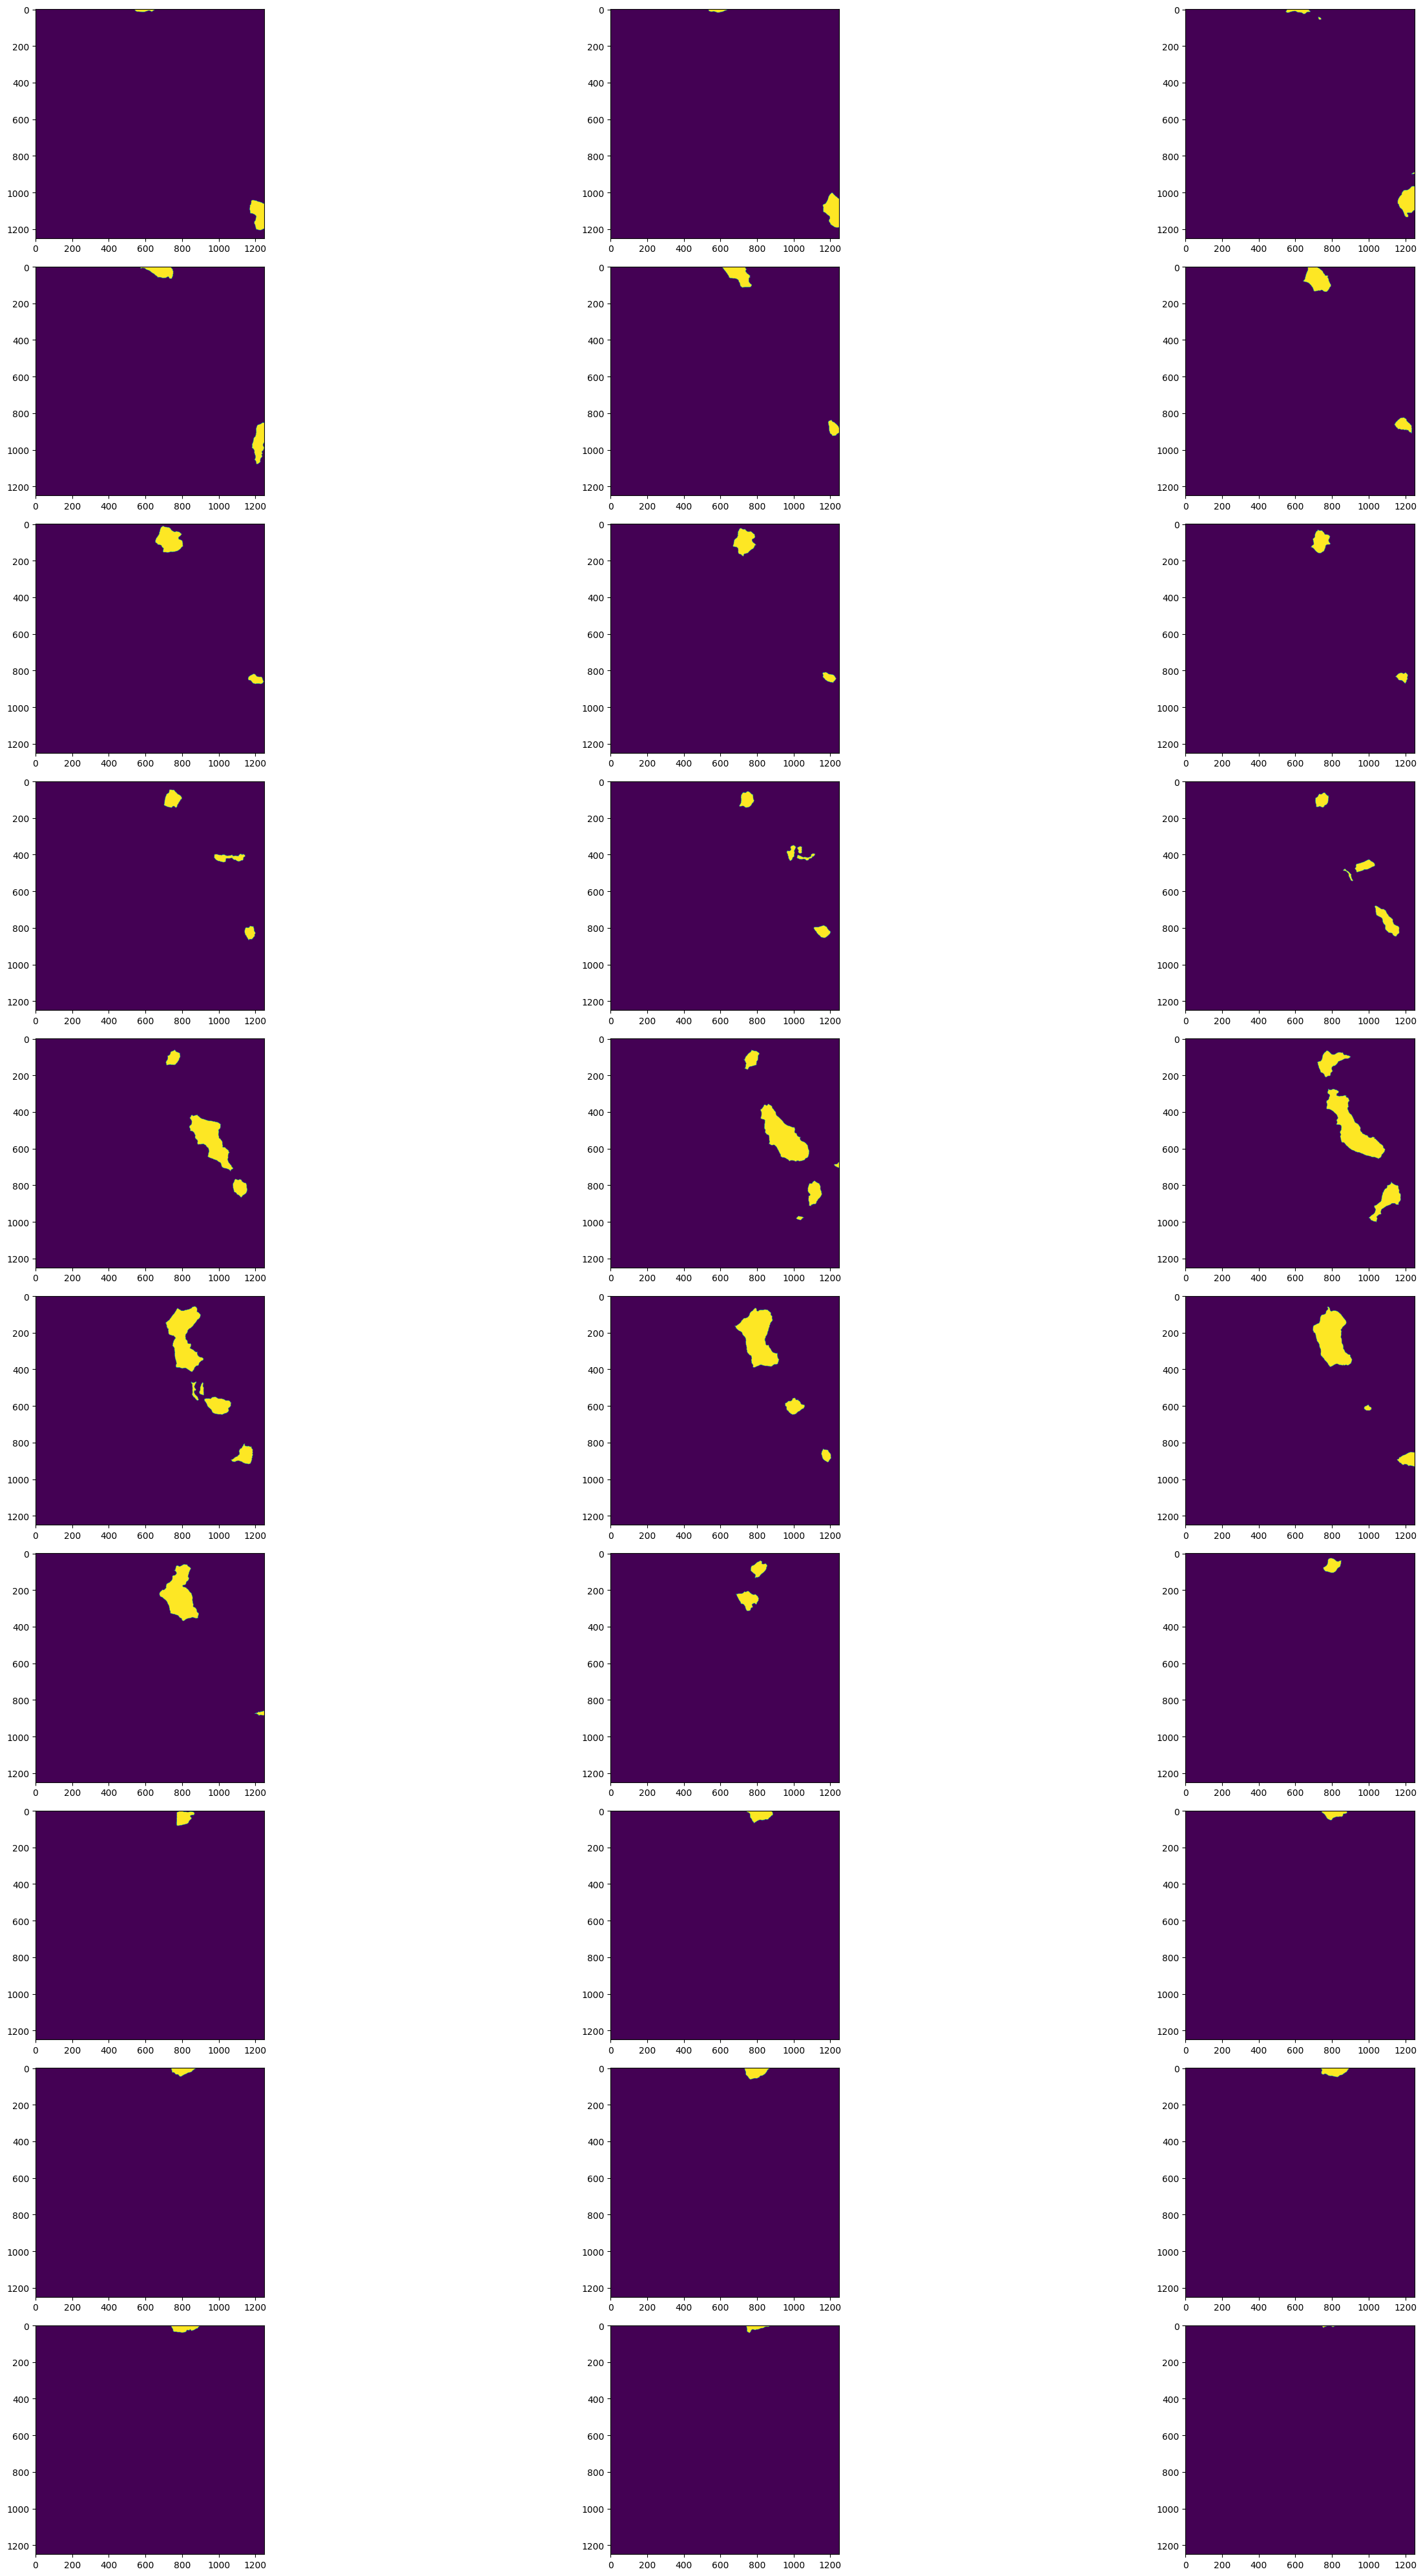

In [32]:
plt.rcParams["figure.figsize"] = [40, 40]
plt.rcParams["figure.autolayout"] = True
# f, axarr = f.add_subplot(10,1)
f.suptitle('Vertically stacked subplots')
for z in range(30):
  plt.subplot(10, 3, 1+z)
  plt.imshow(clipped_neuron_ids[z*4,:,:])
  # axarr[z].imshow(clipped_neuron_ids[z*10,:,:])

In [5]:
clipped_missing_clefts = np.where(clefts == 105, 1, 0)

In [6]:

missing_clefts_layer_sum = np.sum(clipped_missing_clefts, axis=(1,2))
print(missing_clefts_layer_sum.shape)
print(missing_clefts_layer_sum)
print(missing_clefts_layer_sum.argmax())

(100,)
[  0   0   0   0   0   0   0   0   0   0   5 171 163 130 138 184 126 139
  40  68   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
15


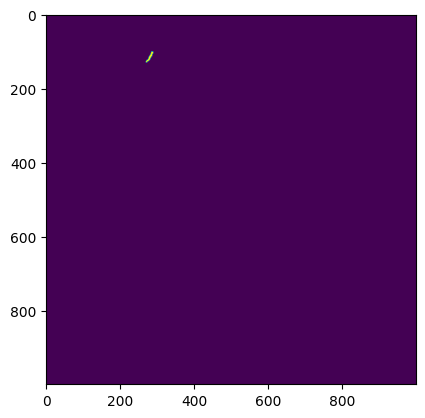

In [7]:
plt.imshow(clipped_missing_clefts[15,:,:])